# Perceptron Implementation

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

#### Training data sets for 3 operations
Each element is of type ([x1, x2, bias], label)

In [3]:
training_data_NOT = [(np.array([0,1]), 1),
                     (np.array([1,1]), 0)]

training_data_OR = [(np.array([0,0,1]), 0),
                    (np.array([0,1,1]), 1),
                    (np.array([1,0,1]), 1),
                    (np.array([1,1,1]), 1)]

training_data_AND = [(np.array([0,0,1]), 0),
                     (np.array([0,1,1]), 0),
                     (np.array([1,0,1]), 0),
                     (np.array([1,1,1]), 1)]

training_data_NAND = [(np.array([0,0,1]), 1),
                      (np.array([0,1,1]), 1),
                      (np.array([1,0,1]), 1),
                      (np.array([1,1,1]), 0)]

training_data_XNOR = [(np.array([0,0,1]), 1),
                     (np.array([0,1,1]), 0),
                     (np.array([1,0,1]), 0),
                     (np.array([1,1,1]), 1)]

Using a step activation function for these simple datasets.

In [4]:
def step_activation(x):
    return 0 if x < 0 else 1

### Learning

Each data point is picked up one by one. Its dot product with the weights vector is computed and fed into the step activation function. Weights are updated depending on the computed error (difference in expected and estimated values).

In [9]:
learning_rate = 0.2
epochs = 500

def learn(training_data, weights, epochs):
    for i in range(epochs):
        x, label = random.choice(training_data)
        dot_product = np.dot(weights, x)
        error = label - step_activation(dot_product)
        weights += learning_rate * error * x
    print(weights)

Simple function to plot data points and decision boundary using matplotlib.

In [10]:
def plot(testing_data, weights, title, is_NOT = False):
    plt.rcParams['figure.figsize'] = (6.0, 5.0)
    plt.title(title)
    plt.xlim([-1,2])
    plt.ylim([-0.5,1.5])
    if is_NOT:
        x = (-1 * weights[1] / weights[0])
        y = 0
        plt.scatter([x[0][0] for x in testing_data], [0] * len(testing_data), marker='o', c='b')
        plt.plot(x, y, 'ro')
    else:
        x = np.arange(-2,3,0.1)
        y = ((-1 * weights[1] / weights[0]) * x) + (-1 * weights[2] / weights[0])
        plt.scatter([x[0][0] for x in testing_data], [x[0][1] for x in testing_data], marker='o', c='b')
        plt.plot(x, y)
    plt.show()

Initially I'm assigning random weights for all 3 of our inputs (x1, x2, b). These weights are passed into the learn function which modifies them iteratively over several epochs.

[-0.37777248  0.08098013]


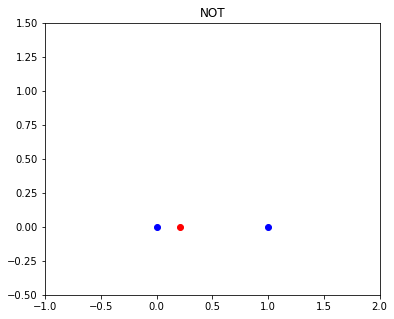

[ 0.75461604  0.20330374 -0.01965524]


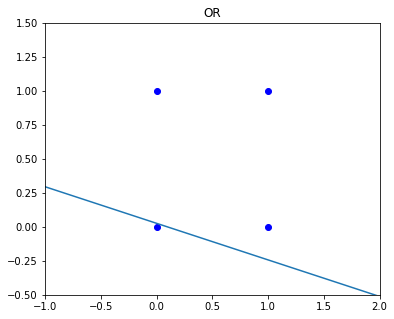

[ 0.29069478  0.42159836 -0.58026864]


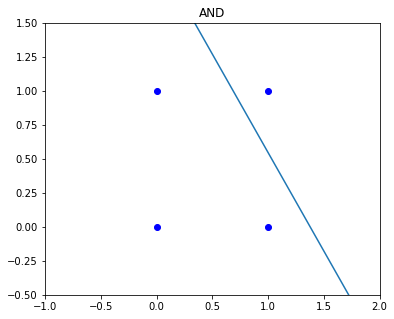

[-0.30002094 -0.26771245  0.41338543]


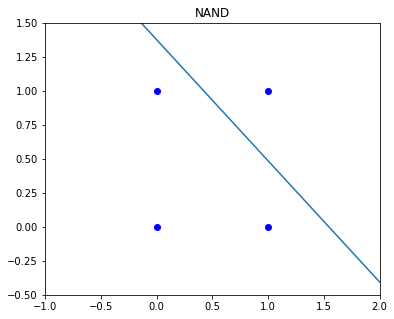

[ 0.18947038 -0.34508962  0.1639647 ]


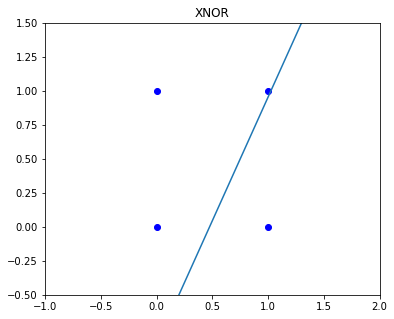

[0.03016839 0.10321987 0.1815188 ]


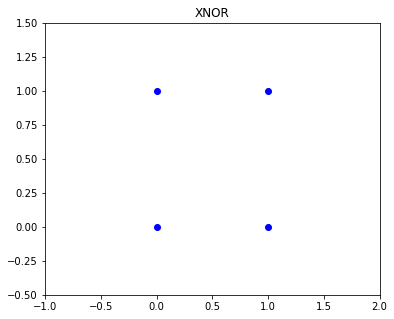

[ 0.16567316  0.11180388 -0.48811483]


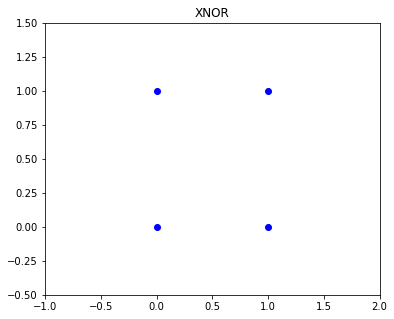

In [11]:
weights = np.random.rand(2)
learn(training_data_NOT, weights, epochs)
plot(training_data_NOT, weights, "NOT", is_NOT=True)

weights = np.random.rand(3)
learn(training_data_OR, weights, epochs)
plot(training_data_OR, weights, "OR")

weights = np.random.rand(3)
learn(training_data_AND, weights, epochs)
plot(training_data_AND, weights, "AND")

weights = np.random.rand(3)
learn(training_data_NAND, weights, epochs)
plot(training_data_NAND, weights, "NAND")

# 3 tries for XNOR.
weights = np.random.rand(3)
learn(training_data_XNOR, weights, epochs)
plot(training_data_XNOR, weights, "XNOR")
weights = np.random.rand(3)
learn(training_data_XNOR, weights, epochs)
plot(training_data_XNOR, weights, "XNOR")
weights = np.random.rand(3)
learn(training_data_XNOR, weights, epochs)
plot(training_data_XNOR, weights, "XNOR")

XNOR draws a line that does not separate the data points properly which shows that XNOR isn't learnable by a single perceptron. 